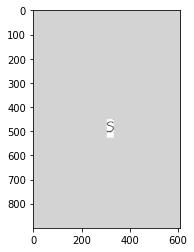

In [2]:
from PIL import Image 
import matplotlib.pyplot as plt 
Image1 = Image.open('gris.jpg') 
w,h=Image1.size 
Image1copy = Image1.copy() 
Image2 = Image.open('./caracteres/word0/caractere0.png') 
Image2copy = Image2.copy() 
  
Image1copy.paste(Image2copy, (w//2, h//2)) 
plt.imshow(Image1copy)
Image1copy.save('img.png') 

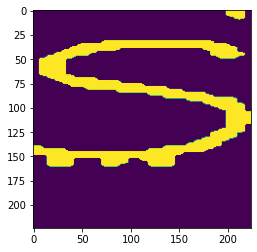

In [6]:
import cv2
im= cv2.imread('./caracteres/word0/caractere0.png')
#im=cv2.imread("/home/yasmine/Téléchargements/maj/K.jpeg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im=cv2.resize(im, (15,15))
im=cv2.resize(im, (224,224))
plt.imshow(im)
#im=255-im
_, im = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY_INV)

cv2.imwrite('img.jpg',im) 
plt.imshow(im)
#im.save('img.jpg', 'JPEG')
Image1 = Image.open('noir.png') 
newsize=(250,250)
Image1 = Image1.resize(newsize)
w,h=Image1.size 
Image1copy = Image1.copy() 
#im= cv2.imread("img.png")
#plt.imshow(255-im)
Image2 = Image.open('img.jpg') 
Image1copy.paste(Image2, (5, 5))
#img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#plt.imshow(img_gray)
#plt.imshow(Image1copy)
Image1copy.save('img.png') 

In [8]:
import numpy as np

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


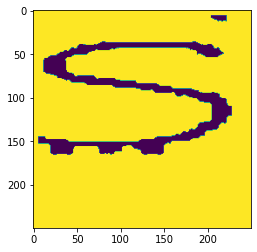

In [19]:
im= cv2.imread('img.png')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(im_gray, (5,5), 1)

#plt.imshow(image)
#th =  cv2.adaptiveThreshold(im_gray,0,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,2,2)
th = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#plt.imshow(th)
contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, -1, (0,255,0), 2)
# create an empty mask
mask = np.zeros(image.shape[:2], dtype=np.uint8)
# loop through the contours
for i, cnt in enumerate(contours):
    # if the contour has no other contours inside of it
    if hierarchy[0][i][2] == -1:
        # if the size of the contour is greater than a threshold
        if cv2.contourArea(cnt) <70:
            cv2.drawContours(mask, [cnt], 0, (255), -1)
plt.imshow(mask)
result=th-mask
plt.imshow(result)
cv2.imwrite('img.jpg',result)
im=cv2.imread('img.jpg')
plt.imshow(im)
im = cv2.GaussianBlur(im, (5,5), 0)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray)
_, img_thresh = cv2.threshold(im_gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_thresh)

In [15]:
from tensorflow.keras.models import load_model
model = load_model('modelAZ1.model')

In [16]:
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames=[i for i in labelNames ]

1


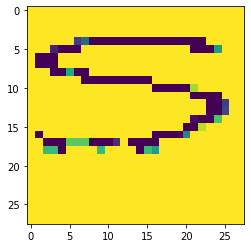

In [17]:
#image=cv2.imread("./caracteres/word0/caractere1.png")
img_copy = img_thresh.copy()
#img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#img_copy = cv2.GaussianBlur(img_copy, (5,5), 0)
#img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
#plt.imshow(img_gray)
img_copy = cv2.resize(img_copy, (28,28))
#_, img_thresh = cv2.threshold(img_copy, 200, 255, cv2.THRESH_BINARY_INV)
#plt.imshow(img_thresh )
#img_final = cv2.resize(img_thresh, (28,28))
plt.imshow(img_copy)
img_final =img_copy.reshape(1,28,28,1)

data = np.array(img_final, dtype="float32")
data /= 255.0
img_pred = labelNames[np.argmax(model.predict(data))]
print(img_pred)

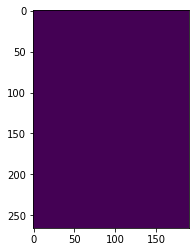

In [28]:
import numpy as np
im=preprocessing('img.png')
plt.imshow(im)

In [27]:
def preprocessing(path):
    image = cv2.imread(path)
    im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h,w=im_gray.shape
    #cv2.imwrite('img.jpg',result)
    #image=cv2.imread('img.jpg')
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(im_gray, (5,5), 1)
    #plt.imshow(image)
    th =  cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)
    #plt.imshow(th)
    #cv2.imwrite('img.jpg',th)
    #image=cv2.imread('img.jpg')
    #gray = cv2.cvtColor(th, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray)
    contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img, contours, -1, (0,255,0), 2)
    # create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # loop through the contours
    for i, cnt in enumerate(contours):
        # if the contour has no other contours inside of it
        if hierarchy[0][i][2] == -1:
            # if the size of the contour is greater than a threshold
            if cv2.contourArea(cnt) <10:
                cv2.drawContours(mask, [cnt], 0, (255), -1)
    #plt.imshow(mask)
    result=th+mask
    #plt.imshow(result)
    result = cv2.GaussianBlur(result, (3,3), 0)
    #plt.imshow(result)
    thresh = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
    detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,
    horizontal_kernel, iterations=2)

    cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        cv2.drawContours(result, [c], -1, (255, 255, 255), 2)
    #plt.imshow(result)
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 6))
    result =255 -  cv2.morphologyEx(255 - result, cv2.MORPH_CLOSE, repair_kernel,
                                iterations=1)


    
    return result